In [ ]:
from sqlalchemy import create_engine
from pathlib import Path
import pandas as pd

In [52]:
import numpy as np

# Querying data
From a database or dataframe.

In [ ]:
db_path = Path('data/ed_warehouse.db')

engine = create_engine(f'sqlite:///{db_path}')

In [11]:
conn = engine.connect()

In [23]:
stores = pd.read_sql('SELECT * FROM walmart_stores', con=conn)

In [24]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [25]:
other = pd.read_sql('SELECT * FROM walmart_other', con=conn)

In [26]:
other

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.096,8.106,FALSE
1,1,2010-02-12,38.51,2.548,NA,NA,NA,NA,NA,211.242,8.106,TRUE
2,1,2010-02-19,39.93,2.514,NA,NA,NA,NA,NA,211.289,8.106,FALSE
3,1,2010-02-26,46.63,2.561,NA,NA,NA,NA,NA,211.32,8.106,FALSE
4,1,2010-03-05,46.50,2.625,NA,NA,NA,NA,NA,211.35,8.106,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3,2449.97,3169.69,NA,NA,FALSE
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NA,NA,FALSE
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NA,NA,FALSE
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363,1059.46,NA,NA,FALSE


## Dataframe queries

SQL-like syntax to data selection with dataframes. 

In [71]:
sales.query('Store == 1 and Dept == 1')

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,FALSE
1,1,1,2010-02-12,46039.49,TRUE
2,1,1,2010-02-19,41595.55,FALSE
3,1,1,2010-02-26,19403.54,FALSE
4,1,1,2010-03-05,21827.90,FALSE
...,...,...,...,...,...
138,1,1,2012-09-28,18947.81,FALSE
139,1,1,2012-10-05,21904.47,FALSE
140,1,1,2012-10-12,22764.01,FALSE
141,1,1,2012-10-19,24185.27,FALSE


Supports f-strings:



In [72]:
store = 2
sales.query(f'Store == {store}')

,Store,Dept,Date,Weekly_Sales,IsHoliday
10244,2,1,2010-02-05,35034.06,FALSE
10245,2,1,2010-02-12,60483.70,TRUE
10246,2,1,2010-02-19,58221.52,FALSE
10247,2,1,2010-02-26,25962.32,FALSE
10248,2,1,2010-03-05,27372.05,FALSE
...,...,...,...,...,...
20477,2,99,2012-08-31,20.07,FALSE
20478,2,99,2012-09-07,0.12,TRUE
20479,2,99,2012-09-14,0.06,FALSE
20480,2,99,2012-10-05,595.00,FALSE


# Joining / Merging data
We can join `other` and `stores` on the `Store` column:

In [29]:
other_stores = other.merge(right=stores, on='Store')

In [30]:
other_stores.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.096,8.106,FALSE,A,151315
1,1,2010-02-12,38.51,2.548,NA,NA,NA,NA,NA,211.242,8.106,TRUE,A,151315
2,1,2010-02-19,39.93,2.514,NA,NA,NA,NA,NA,211.289,8.106,FALSE,A,151315
3,1,2010-02-26,46.63,2.561,NA,NA,NA,NA,NA,211.32,8.106,FALSE,A,151315
4,1,2010-03-05,46.50,2.625,NA,NA,NA,NA,NA,211.35,8.106,FALSE,A,151315


In [27]:
sales = pd.read_sql('SELECT * FROM walmart_historical_sales', con=conn)

Joining on two columns:

In [65]:
sales_all = sales.merge(right=other_stores, on=['Store','Date'])

In [66]:
sales_all.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,FALSE,42.31,2.572,NA,NA,NA,NA,NA,211.096,8.106,FALSE,A,151315
1,1,2,2010-02-05,50605.27,FALSE,42.31,2.572,NA,NA,NA,NA,NA,211.096,8.106,FALSE,A,151315
2,1,3,2010-02-05,13740.12,FALSE,42.31,2.572,NA,NA,NA,NA,NA,211.096,8.106,FALSE,A,151315
3,1,4,2010-02-05,39954.04,FALSE,42.31,2.572,NA,NA,NA,NA,NA,211.096,8.106,FALSE,A,151315
4,1,5,2010-02-05,32229.38,FALSE,42.31,2.572,NA,NA,NA,NA,NA,211.096,8.106,FALSE,A,151315


# Grouping data
Ignoring departments, what are the weekly sales at the store-level?

In [58]:
store_sales = sales.groupby(['Store','Date']).Weekly_Sales.sum()

In [63]:
store_sales

Store  Date      
1      2010-02-05    1643690.90
       2010-02-12    1641957.44
       2010-02-19    1611968.17
       2010-02-26    1409727.59
       2010-03-05    1554806.68
                        ...    
45     2012-09-28     713173.95
       2012-10-05     733455.07
       2012-10-12     734464.36
       2012-10-19     718125.53
       2012-10-26     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

Let's convert this series back to a dataframe:

In [64]:
store_sales = store_sales.to_frame().reset_index();
store_sales

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
6430,45,2012-09-28,713173.95
6431,45,2012-10-05,733455.07
6432,45,2012-10-12,734464.36
6433,45,2012-10-19,718125.53


# Pivot data

https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [79]:
store_sales_view = store_sales.pivot(index='Date',columns='Store',values='Weekly_Sales' )

In [80]:
store_sales_view

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75,...,467546.74,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51
2010-02-12,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52,...,469563.70,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65
2010-03-05,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09,...,480203.43,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1437059.26,1746470.56,389813.02,2027620.23,310141.68,1369131.46,525545.76,884724.41,516361.06,1694862.41,...,270677.98,527953.14,398468.08,1495607.07,919595.44,1307928.01,505978.46,577792.32,355307.94,713173.95
2012-10-05,1670785.97,1998321.04,443557.65,2209835.43,343048.29,1518177.71,505830.56,976436.02,606755.30,1758971.38,...,277137.86,546122.37,458479.01,1574408.67,1069112.00,1400160.95,593162.53,642614.89,337390.44,733455.07
2012-10-12,1573072.81,1900745.13,410804.39,2133026.07,325345.41,1459396.84,503463.93,927511.99,558464.80,1713889.11,...,300236.85,521810.75,437320.66,1494417.07,982523.26,1409544.97,612379.90,619369.72,337796.13,734464.36


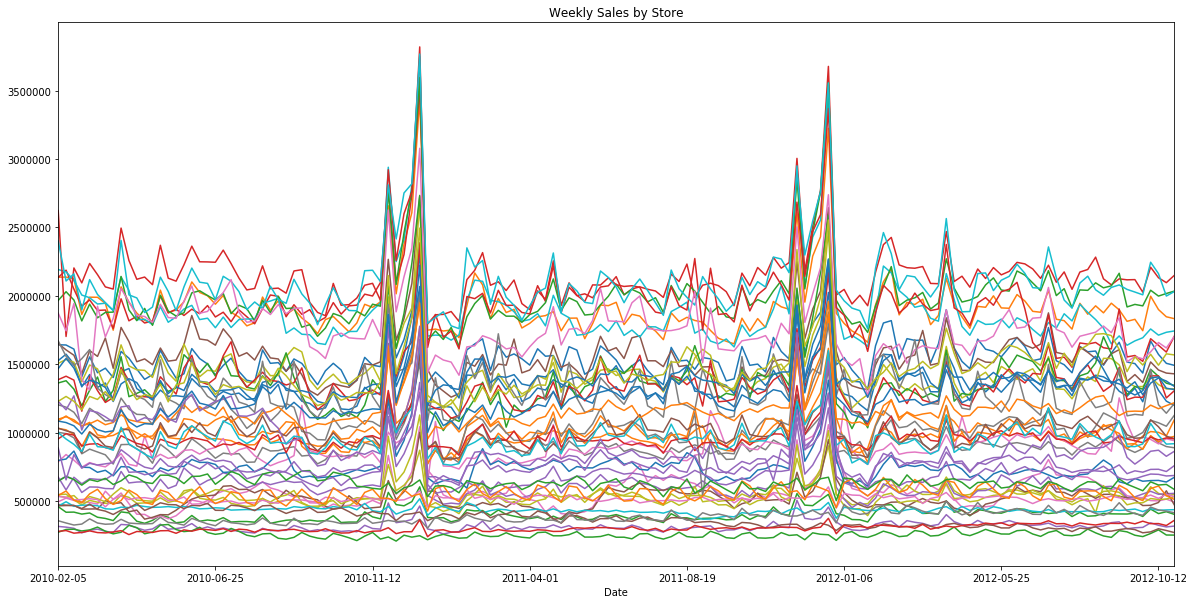

In [90]:
store_sales_view.plot(figsize=(20,10), legend=False, title='Weekly Sales by Store')

# Window functions

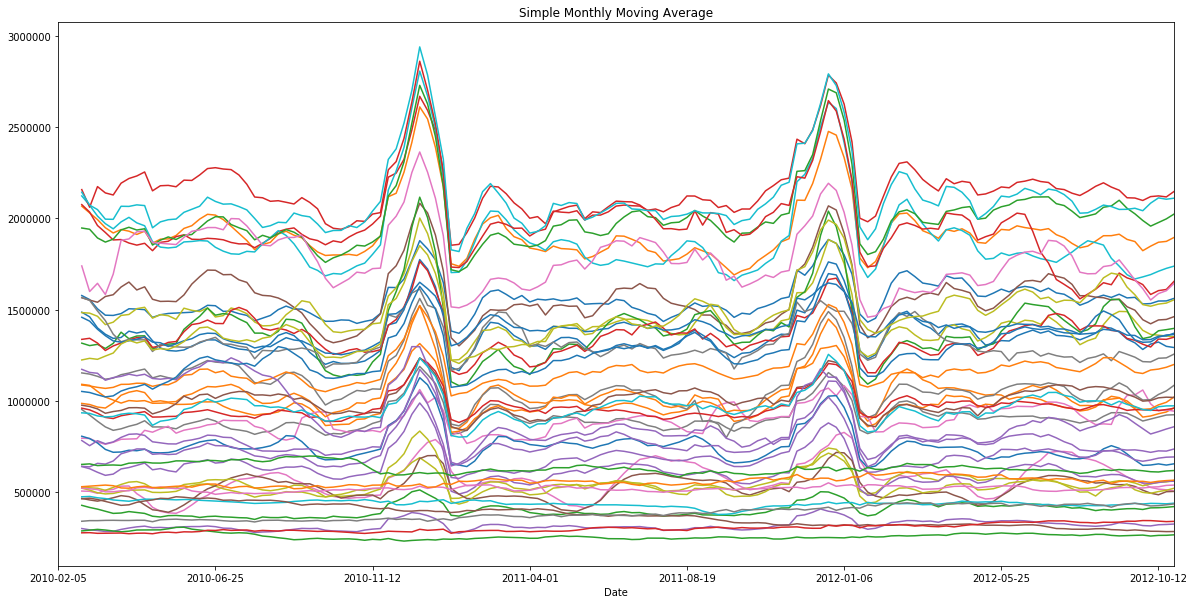

In [101]:
store_sales_view.rolling(4).mean().plot(figsize=(20,10), legend=False, title='Simple Monthly Moving Average')

# Cumulative functions

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.cumsum.html  
https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.cumprod.html

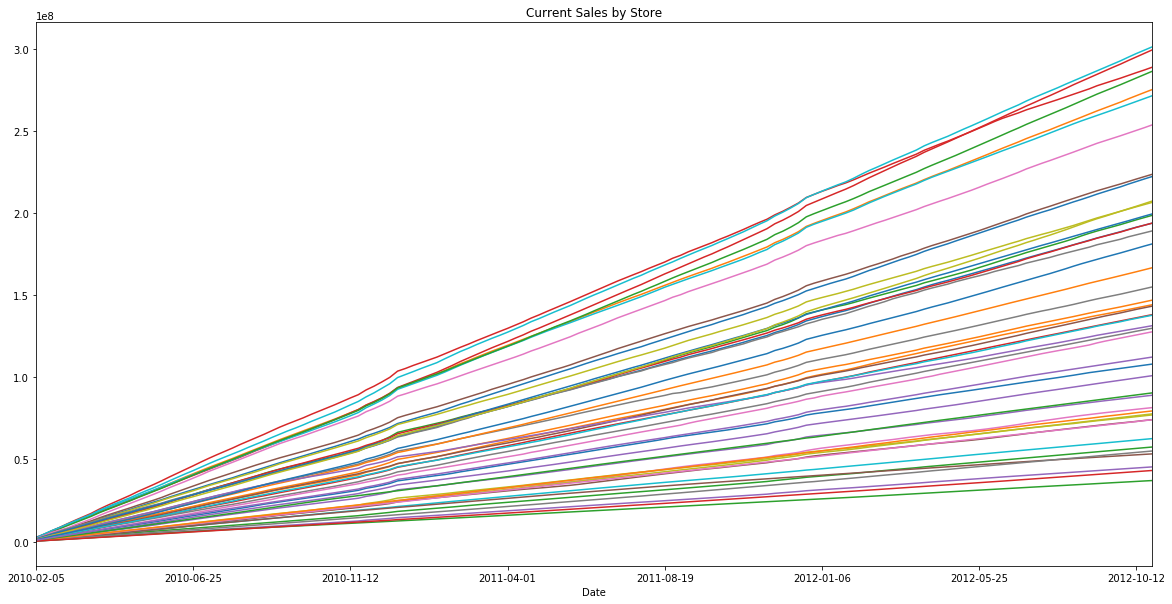

In [100]:
store_sales_view.cumsum().plot(figsize=(20,10), legend=False, title='Current Sales by Store')

Some stores perform better than others.